In [2]:
import sys
sys.path.append('../')

from quantumsim import *
import pennylane as qml
from pennylane import numpy as np
import pandas as pd

In [6]:
np.linspace(1.5, 7.5, 21)

tensor([1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1,
        5.4, 5.7, 6. , 6.3, 6.6, 6.9, 7.2, 7.5], requires_grad=True)

In [5]:
def space(x):
    #return np.array([0.0, 0.0, 0.0, 0.0, 0.0, x, 0.0, x/2.0, np.sqrt(x*x - (x*x)/4)], requires_grad=True)
    return np.array([0.0, 0.0, 0.0, 0.0, x, 0.0, 0.0, x/2.0, x*np.sqrt(3.0/4.0)], requires_grad=True)

distance = np.linspace(1.5, 7.5, 21)
for i in distance:
    print(space(i))

[0.         0.         0.         0.         1.5        0.
 0.         0.75       1.29903811]
[0.         0.         0.         0.         1.8        0.
 0.         0.9        1.55884573]
[0.         0.         0.         0.         2.1        0.
 0.         1.05       1.81865335]
[0.         0.         0.         0.         2.4        0.
 0.         1.2        2.07846097]
[0.         0.         0.         0.         2.7        0.
 0.         1.35       2.33826859]
[0.         0.         0.         0.         3.         0.
 0.         1.5        2.59807621]
[0.         0.         0.         0.         3.3        0.
 0.         1.65       2.85788383]
[0.         0.         0.         0.         3.6        0.
 0.         1.8        3.11769145]
[0.         0.         0.         0.         3.9        0.
 0.         1.95       3.37749907]
[0.        0.        0.        0.        4.2       0.        0.
 2.1       3.6373067]
[0.         0.         0.         0.         4.5        0.
 0.      

In [4]:
hopping = [0.5, 0.75, 1.0, 1.25, 1.5]
U = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for t in hopping:
    for u in U:
        print(t,u)
        params1 = {
                "sites": 6, 
                "hopping": t,
                "potential": u, 
                "electric": 0.0,
                "interactions": ["on-site"]
                }

        params_lat = {
            "bound": False,
            "lattice": "chain",
            "size": (1,6)
        }

        hubbard_chain1 = vqe_fermihubbard(params1, params_lat)
                
        ansatz_params = {
                    "repetitions": 1,
                    "base": "default.qubit",
                    "interface": "autograd",
                    "electrons": params1["sites"],
                    "qubits": hubbard_chain1.qubits,
                }

        ansazt = upccgsd_ansatz()
        ansazt.set_device( ansatz_params )
        ansazt.set_node( ansatz_params )
        ansazt.set_state( ansatz_params["electrons"], sz=0)
        a,b = qml.kUpCCGSD.shape(k=ansatz_params["repetitions"], n_wires=hubbard_chain1.qubits, delta_sz=0)

        minimizate_params = {
                        "maxiter": 100,
                        "tol": 1e-6,
                        "number":  a*b,
                        "theta":["generic", 0.2]}

        hubbard_chain1.node = ansazt.node
        optimizer = gradiend_optimizer(minimizate_params)
        energy1, optimum = optimizer.VQE(hubbard_chain1.cost_function)

        #aux = pd.DataFrame(energy1)
        #aux.to_csv("../molecules1DFH/open_kupccgsd_"+str(params1["sites"])+"_t"+str(t)+"_u"+str(u)+".csv")
    

0.5 0.0


In [4]:
hopping = [0.5, 0.75, 1.0, 1.25, 1.5]
U = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for t in hopping:
    for u in U:
        params1 = {
                "sites": 6, 
                "hopping": t,
                "potential": u, 
                "electric": 0.0,
                "interactions": ["on-site"]
                }

        params_lat = {
            "bound": False,
            "lattice": "chain",
            "size": (1,6)
        }

        hubbard_chain1 = vqe_fermihubbard(params1, params_lat)
                
        ansatz_params = {
                    "repetitions": 1,
                    "base": "default.qubit",
                    "interface": "autograd",
                    "electrons": params1["sites"],
                    "qubits": hubbard_chain1.qubits,
                }

        ansazt = upccgsd_ansatz()
        ansazt.set_device( ansatz_params )
        ansazt.set_node( ansatz_params )
        ansazt.set_state( ansatz_params["electrons"] )
        a,b = qml.kUpCCGSD.shape(k=ansatz_params["repetitions"], n_wires=hubbard_chain1.qubits, delta_sz=0)

        minimizate_params = {
                        "maxiter": 100,
                        "tol": 1e-6,
                        "number":  a*b,
                        "theta":["generic", 0.2]}

        hubbard_chain1.node = ansazt.node
        optimizer = gradiend_optimizer(minimizate_params)
        energy1, optimum = optimizer.VQE(hubbard_chain1.cost_function)

        aux = pd.DataFrame(energy1)
        aux.to_csv("../molecules1DFH/open_kupccgsd_"+str(params1["sites"])+"_t"+str(t)+"_u"+str(u)+".csv")

KeyboardInterrupt: 

In [21]:
femionic_sentence = -1.256339073*qml.FermiC(0)*qml.FermiA(0) -0.471896*qml.FermiC(1)*qml.FermiA(1) +\
    -1.256339073*qml.FermiC(2)*qml.FermiA(2) -0.471896*qml.FermiC(3)*qml.FermiA(3) +\
    0.337855*qml.FermiC(0)*qml.FermiC(0)*qml.FermiA(0)*qml.FermiA(0) +\
    0.0904655*qml.FermiC(0)*qml.FermiC(0)*qml.FermiA(1)*qml.FermiA(1) +\
    0.0904655*qml.FermiC(0)*qml.FermiC(1)*qml.FermiA(0)*qml.FermiA(1) +\
    0.3322908*qml.FermiC(0)*qml.FermiC(1)*qml.FermiA(1)*qml.FermiA(0) +\
    0.337855*qml.FermiC(0)*qml.FermiC(2)*qml.FermiA(2)*qml.FermiA(0) +\
    0.0904655*qml.FermiC(0)*qml.FermiC(2)*qml.FermiA(3)*qml.FermiA(1) +\
    0.0904655*qml.FermiC(0)*qml.FermiC(3)*qml.FermiA(2)*qml.FermiA(1) +\
    0.3322908*qml.FermiC(0)*qml.FermiC(3)*qml.FermiA(3)*qml.FermiA(0) +\
    0.3322908*qml.FermiC(1)*qml.FermiC(0)*qml.FermiA(0)*qml.FermiA(1) +\
    0.0904655*qml.FermiC(1)*qml.FermiC(0)*qml.FermiA(1)*qml.FermiA(0) +\
    0.0904655*qml.FermiC(1)*qml.FermiC(1)*qml.FermiA(0)*qml.FermiA(0) +\
    0.349286*qml.FermiC(1)*qml.FermiC(1)*qml.FermiA(1)*qml.FermiA(1) +\
    0.3322908*qml.FermiC(1)*qml.FermiC(2)*qml.FermiA(2)*qml.FermiA(1) +\
    0.0904655*qml.FermiC(1)*qml.FermiC(2)*qml.FermiA(3)*qml.FermiA(0) +\
    0.0904655*qml.FermiC(1)*qml.FermiC(3)*qml.FermiA(2)*qml.FermiA(0) +\
    0.349286*qml.FermiC(1)*qml.FermiC(3)*qml.FermiA(3)*qml.FermiA(1) +\
    0.337855*qml.FermiC(2)*qml.FermiC(0)*qml.FermiA(0)*qml.FermiA(2) +\
    0.0904655*qml.FermiC(2)*qml.FermiC(0)*qml.FermiA(1)*qml.FermiA(3) +\
    0.0904655*qml.FermiC(2)*qml.FermiC(1)*qml.FermiA(0)*qml.FermiA(3) +\
    0.3322908*qml.FermiC(2)*qml.FermiC(1)*qml.FermiA(1)*qml.FermiA(2) +\
    0.337855*qml.FermiC(2)*qml.FermiC(2)*qml.FermiA(2)*qml.FermiA(2) +\
    0.0904655*qml.FermiC(2)*qml.FermiC(2)*qml.FermiA(3)*qml.FermiA(3) +\
    0.0904655*qml.FermiC(2)*qml.FermiC(3)*qml.FermiA(2)*qml.FermiA(3) +\
    0.3322908*qml.FermiC(2)*qml.FermiC(3)*qml.FermiA(3)*qml.FermiA(2) +\
    0.3322908*qml.FermiC(3)*qml.FermiC(0)*qml.FermiA(0)*qml.FermiA(3) +\
    0.0904655*qml.FermiC(3)*qml.FermiC(0)*qml.FermiA(1)*qml.FermiA(2) +\
    0.0904655*qml.FermiC(3)*qml.FermiC(1)*qml.FermiA(0)*qml.FermiA(2) +\
    0.349286*qml.FermiC(3)*qml.FermiC(1)*qml.FermiA(1)*qml.FermiA(3) +\
    0.3322908*qml.FermiC(3)*qml.FermiC(2)*qml.FermiA(2)*qml.FermiA(3) +\
    0.0904655*qml.FermiC(3)*qml.FermiC(2)*qml.FermiA(3)*qml.FermiA(2) +\
    0.0904655*qml.FermiC(3)*qml.FermiC(3)*qml.FermiA(2)*qml.FermiA(2) +\
    +0.349286*qml.FermiC(3)*qml.FermiC(3)*qml.FermiA(3)*qml.FermiA(3)

In [23]:
coeff, terms = qml.jordan_wigner( femionic_sentence, ps=True ).hamiltonian().terms()
        #del fermi_sentence, fermi_hopping, fermi_E, fermi_U

to_delete = []
for i,c in enumerate(coeff):
            if c==0.0:
                to_delete.append(i)
            if isinstance(terms[i], qml.Identity):
                terms[i] = qml.Identity(wires=[0])
        
to_delete = -np.sort(-np.array(to_delete))
for index in to_delete:
            coeff.pop(index)
            terms.pop(index)

In [27]:
for i,t in enumerate(terms):
    print(coeff[i], t)

(-0.8105484729999995+0j) Identity(wires=[0])
(0.1721839865+0j) PauliZ(wires=[0])
(-0.22575304999999998+0j) PauliZ(wires=[1])
(0.1721839864999999+0j) PauliZ(wires=[2])
(-0.22575305+0j) PauliZ(wires=[3])
(0.12091265000000001+0j) PauliZ(wires=[0]) @ PauliZ(wires=[1])
(0.1689275+0j) PauliZ(wires=[0]) @ PauliZ(wires=[2])
(0.045232749999999995+0j) PauliY(wires=[0]) @ PauliY(wires=[2]) @ PauliY(wires=[3]) @ PauliY(wires=[1])
(0.045232749999999995+0j) PauliY(wires=[0]) @ PauliX(wires=[2]) @ PauliX(wires=[3]) @ PauliY(wires=[1])
(0.045232749999999995+0j) PauliX(wires=[0]) @ PauliY(wires=[2]) @ PauliY(wires=[3]) @ PauliX(wires=[1])
(0.045232749999999995+0j) PauliX(wires=[0]) @ PauliX(wires=[2]) @ PauliX(wires=[3]) @ PauliX(wires=[1])
(0.1661454+0j) PauliZ(wires=[0]) @ PauliZ(wires=[3])
(0.1661454+0j) PauliZ(wires=[1]) @ PauliZ(wires=[2])
(0.174643+0j) PauliZ(wires=[1]) @ PauliZ(wires=[3])
(0.12091265000000001+0j) PauliZ(wires=[2]) @ PauliZ(wires=[3])


In [26]:
symbols = ["H", "H"]
coordinates = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 1.3889486016])

H, qubits = qml.qchem.molecular_hamiltonian(symbols, coordinates)
print("Number of qubits = ", qubits)
print("The Hamiltonian is ", H)

Number of qubits =  4
The Hamiltonian is    (-0.2257535126519838) [Z2]
+ (-0.22575351265198373) [Z3]
+ (-0.09057892510997859) [I0]
+ (0.17218394115525779) [Z0]
+ (0.17218394115525784) [Z1]
+ (0.12091263557674561) [Z0 Z2]
+ (0.12091263557674561) [Z1 Z3]
+ (0.16614543463425685) [Z0 Z3]
+ (0.16614543463425685) [Z1 Z2]
+ (0.16892754159562368) [Z0 Z1]
+ (0.17464343234716045) [Z2 Z3]
+ (-0.04523279905751126) [Y0 Y1 X2 X3]
+ (-0.04523279905751126) [X0 X1 Y2 Y3]
+ (0.04523279905751126) [Y0 X1 X2 Y3]
+ (0.04523279905751126) [X0 Y1 Y2 X3]


In [2]:
params1 = {
        "sites": 6, 
        "spin": 0.5,
        "J": [-1.0, -1.0, -1.0], 
        "interactions": []
        }

params_lat = {
    "bound": False,
    "lattice": "chain",
    "size": (1,6)
}

system = vqe_spin(params1, params_lat)
print(system.hamiltonian)

[[PauliX(wires=[0]) @ PauliX(wires=[1]), PauliX(wires=[1]) @ PauliX(wires=[2]), PauliX(wires=[2]) @ PauliX(wires=[3]), PauliX(wires=[3]) @ PauliX(wires=[4]), PauliX(wires=[4]) @ PauliX(wires=[5])], [PauliY(wires=[0]) @ PauliY(wires=[1]), PauliY(wires=[1]) @ PauliY(wires=[2]), PauliY(wires=[2]) @ PauliY(wires=[3]), PauliY(wires=[3]) @ PauliY(wires=[4]), PauliY(wires=[4]) @ PauliY(wires=[5])], [PauliZ(wires=[0]) @ PauliZ(wires=[1]), PauliZ(wires=[1]) @ PauliZ(wires=[2]), PauliZ(wires=[2]) @ PauliZ(wires=[3]), PauliZ(wires=[3]) @ PauliZ(wires=[4]), PauliZ(wires=[4]) @ PauliZ(wires=[5])]]


In [4]:
def space(x):
    return np.array([0.0, 0.0, 0.0, 0.0, 0.0, x, 0.0, x/2, np.sqrt(x*x - (x*x)/4)], requires_grad=True)

symbols = ["H", "H", "H"]
params = {
    'mapping': "jordan_wigner",
    'charge': 1, 
    'mult': 1,
    'basis': 'sto-3g',
    'method': 'dhf',
}
coordinates = space(7)

#system = adap_molecular(symbols, coordinates, params)
system = vqe_molecular(symbols, coordinates, params)

In [10]:
values = []
for i in range(1):
    print(i+1)
    ansatz_params = {
            "repetitions": i+4,
            "base": "default.qubit",
            "interface": "autograd",
            "electrons": 2,
            "qubits": system.qubits
        }

    ansazt = upccgsd_ansatz()
    ansazt.set_device( ansatz_params )
    ansazt.set_node( ansatz_params )
    ansazt.set_state( ansatz_params["electrons"] )
    #ansazt.begin_state = np.array([1,0,0,0,0,1])
    a,b = qml.kUpCCGSD.shape(k=ansatz_params["repetitions"], n_wires=system.qubits, delta_sz=0)

    minimizate_params = {
                "maxiter": 150,
                "tol": 1e-6,
                "number":  a*b,
                "theta":["generic", 0.45]}

    system.node = ansazt.node
    optimizer = gradiend_optimizer(minimizate_params)
    energy1, optimum = optimizer.VQE(system.cost_function)
    values.append(energy1)

1


In [24]:
def space(x):
    return np.array([0.0, 0.0, 0.0, 0.0, 0.0, x, 0.0, x/2, np.sqrt(x*x - (x*x)/4)], requires_grad=True)

symbols = ["H", "H", "H"]
params = {
    'mapping': "jordan_wigner",
    'charge': 1, 
    'mult': 1,
    'basis': 'sto-3g',
    'method': 'dhf',
}
coordinates = space(6)

#system = adap_molecular(symbols, coordinates, params)
system = vqe_molecular(symbols, coordinates, params)

values2 = []
for i in range(1):
    print(i+1)
    ansatz_params = {
            "repetitions": i+1,
            "base": "default.qubit",
            "interface": "autograd",
            "electrons": 2,
            "qubits": system.qubits
        }

    ansazt = upccgsd_ansatz()
    ansazt.set_device( ansatz_params )
    ansazt.set_node( ansatz_params )
    ansazt.set_state( ansatz_params["electrons"] )
    #ansazt.begin_state = np.array([1,0,0,0,0,1])
    a,b = qml.kUpCCGSD.shape(k=ansatz_params["repetitions"], n_wires=system.qubits, delta_sz=0)

    minimizate_params = {
                "maxiter": 150,
                "tol": 1e-6,
                "number":  a*b,
                "theta":["generic", 0.35]}

    system.node = ansazt.node
    optimizer = gradiend_optimizer(minimizate_params)
    energy1, optimum = optimizer.VQE(system.cost_function)
    values2.append(energy1)

1


In [44]:
symbols = ["Li", "H"]
coordinates = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 2.969280527])
params = {
    'mapping': "jordan_wigner",
    'charge': 0, 
    'mult': 1,
    'basis': 'sto-3g',
    'method': 'dhf',
    'active_electrons': 2,
    'active_orbitals':5
}
system = vqe_molecular(symbols, coordinates, params)

values2 = []
for i in range(4):
    ansatz_params = {
            "repetitions": i+1,
            "base": "default.qubit",
            "interface": "autograd",
            "electrons": 2,
            "qubits": system.qubits
        }

    ansazt = upccgsd_ansatz()
    ansazt.set_device( ansatz_params )
    ansazt.set_node( ansatz_params )
    ansazt.set_state( ansatz_params["electrons"] )
    a,b = qml.kUpCCGSD.shape(k=ansatz_params["repetitions"], n_wires=system.qubits, delta_sz=0)

    minimizate_params = {
                "maxiter": 100,
                "tol": 1e-6,
                "number":  a*b,
                "theta":["generic", 0.9]}

    system.node = ansazt.node
    optimizer = gradiend_optimizer(minimizate_params)
    energy1, optimum = optimizer.VQE(system.cost_function)
    values2.append(energy1)

KeyboardInterrupt: 

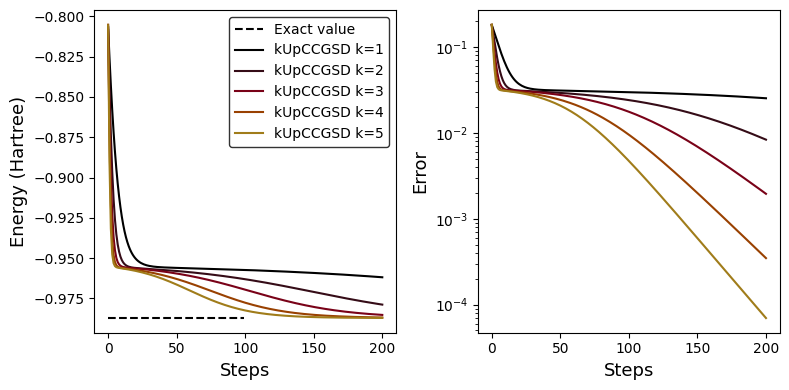

In [70]:
import matplotlib.pyplot as plt
import cmasher as cmr

n = 100
ex = -0.987142228


fig, ax = plt.subplots(1, 2, figsize=(8,4),)
cycle = [cmr.apple(i /7) for i in range(7)]

ax[0].set_xlabel("Steps", fontsize=13)
ax[1].set_xlabel("Steps", fontsize=13)
ax[0].set_ylabel("Energy (Hartree)", fontsize=13)
ax[1].set_ylabel("Error", fontsize=13)

ax[0].plot([j for j in range(n)], [ex for j in range(n)], marker='', color="black", ls="dashed", label="Exact value")
for i in range(5):
    ax[0].plot([j for j in range(len(values[i]))], values[i], label="kUpCCGSD k="+str(i+1), color = cycle[i])
    ax[1].plot([j for j in range(len(values[i]))], [abs(values[i][j]-ex) for j in range(len(values[i]))],"-", label="Exacto", color = cycle[i])

ax[1].set_yscale("log")
ax[0].legend(loc="upper right", fontsize='medium',frameon=True, edgecolor='k', ncol=1)

fig.tight_layout()
plt.show()

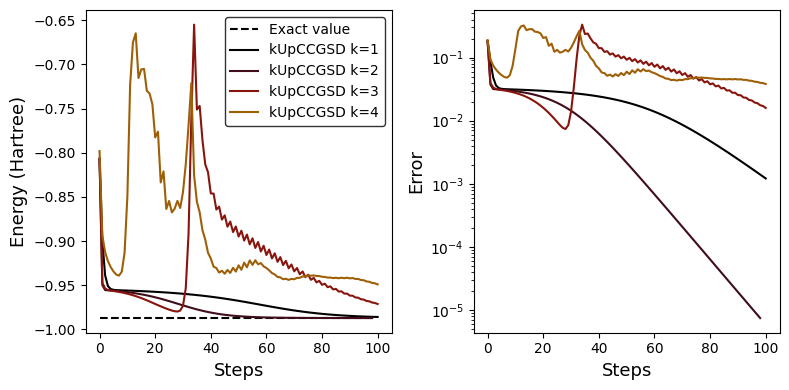

In [60]:
import matplotlib.pyplot as plt
import cmasher as cmr

n = 100
ex = -0.987142228


fig, ax = plt.subplots(1, 2, figsize=(8,4),)
cycle = [cmr.apple(i /6) for i in range(6)]

ax[0].set_xlabel("Steps", fontsize=13)
ax[1].set_xlabel("Steps", fontsize=13)
ax[0].set_ylabel("Energy (Hartree)", fontsize=13)
ax[1].set_ylabel("Error", fontsize=13)

ax[0].plot([j for j in range(n)], [ex for j in range(n)], marker='', color="black", ls="dashed", label="Exact value")
for i in range(4):
    ax[0].plot([j for j in range(len(values[i]))], values[i], label="kUpCCGSD k="+str(i+1), color = cycle[i])
    ax[1].plot([j for j in range(len(values[i]))], [abs(values[i][j]-ex) for j in range(len(values[i]))],"-", label="Exacto", color = cycle[i])

ax[1].set_yscale("log")
ax[0].legend(loc="upper right", fontsize='medium',frameon=True, edgecolor='k', ncol=1)

fig.tight_layout()
plt.show()

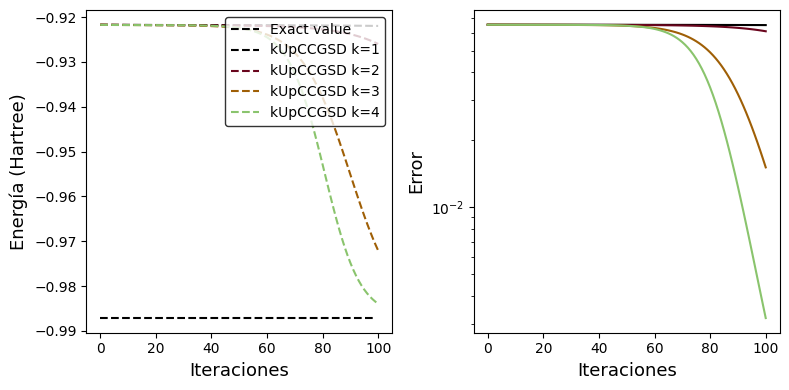

In [19]:
import matplotlib.pyplot as plt
import cmasher as cmr

n = 100
ex = -0.987142228


fig, ax = plt.subplots(1, 2, figsize=(8,4),)
cycle = [cmr.apple(i /4) for i in range(4)]

ax[0].set_xlabel("Iteraciones", fontsize=13)
ax[1].set_xlabel("Iteraciones", fontsize=13)
ax[0].set_ylabel("Energía (Hartree)", fontsize=13)
ax[1].set_ylabel("Error", fontsize=13)

ax[0].plot([j for j in range(n)], [ex for j in range(n)], marker='', color="black", ls="dashed", label="Exact value")
for i in range(4):
    ax[0].plot([j for j in range(len(values[i]))], values[i], ls="dashed", label="kUpCCGSD k="+str(i+1), color = cycle[i])
    ax[1].plot([j for j in range(len(values[i]))], [abs(values[i][j]-ex) for j in range(len(values[i]))],"-", label="Exacto", color = cycle[i])

ax[1].set_yscale("log")
ax[0].legend(loc="upper right", fontsize='medium',frameon=True, edgecolor='k', ncol=1)

fig.tight_layout()
plt.show()

In [27]:
params1 = {
        "sites": 3, 
        "hopping": 1.0,
        "potential": 0.0, 
        "electric": 0.0,
        "interactions": ["on-site"]
        }

params_lat = {
    "bound": False,
    "lattice": "chain",
    "size": (1,3)
}

system = vqe_fermihubbard(params1, params_lat)
print(system.hamiltonian)
print(type( system.hamiltonian ), system.qubits)

1.0 * a⁺(0) a(0)
+ 0.0 * I
+ 1.0 * a⁺(1) a(1)
+ 1.0 * a⁺(2) a(2)
+ 1.0 * a⁺(3) a(3)
+ 1.0 * a⁺(4) a(4)
+ 1.0 * a⁺(5) a(5)
[[PauliY(wires=[1]) @ PauliZ(wires=[2]) @ PauliY(wires=[3]), PauliY(wires=[3]) @ PauliZ(wires=[4]) @ PauliY(wires=[5])], [PauliX(wires=[1]) @ PauliZ(wires=[2]) @ PauliX(wires=[3]), PauliX(wires=[3]) @ PauliZ(wires=[4]) @ PauliX(wires=[5])], [PauliY(wires=[0]) @ PauliZ(wires=[1]) @ PauliY(wires=[2]), PauliY(wires=[2]) @ PauliZ(wires=[3]) @ PauliY(wires=[4])], [PauliX(wires=[0]) @ PauliZ(wires=[1]) @ PauliX(wires=[2]), PauliX(wires=[2]) @ PauliZ(wires=[3]) @ PauliX(wires=[4])]]
<class 'list'> 6


In [2]:
symbols = ["Li", "H"]
coordinates = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 2.969280527])
params = {
    'mapping': "jordan_wigner",
    'charge': 0, 
    'mult': 1,
    'basis': 'sto-3g',
    'method': 'dhf',
    'active_electrons': 2,
    'active_orbitals':5
}

#system = adap_molecular(symbols, coordinates, params)
system = vqe_molecular(symbols, coordinates, params)

IndexError: list index out of range

In [3]:
system.hamiltonian

<Hamiltonian: terms=276, wires=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]>


In [6]:
ansatz_params = {
            "repetitions": 1,
            "base": "default.qubit",
            "interface": "autograd",
            "electrons": 2,
        }

system.set_device( ansatz_params )
system.set_state( ansatz_params["electrons"] )
system.set_node( ansatz_params )

In [7]:
minimizate_params = {
    "maxiter": 20,
    "qubits": system.qubits,
    "electrons": 2,
    "theta":["generic", 0.5]}

optimizer = adap_optimizer(minimizate_params)
energy1 = optimizer.MinimumCircuit(system.node)

24
[[0, 1, 2, 3], [0, 1, 2, 5], [0, 1, 2, 7], [0, 1, 2, 9], [0, 1, 3, 4], [0, 1, 3, 6], [0, 1, 3, 8], [0, 1, 4, 5], [0, 1, 4, 7], [0, 1, 4, 9], [0, 1, 5, 6], [0, 1, 5, 8], [0, 1, 6, 7], [0, 1, 6, 9], [0, 1, 7, 8], [0, 1, 8, 9]]
[array(-0.01278217), array(0.), array(0.), array(0.0342645), array(0.), array(0.), array(-0.0342645), array(-0.02358152), array(0.), array(0.), array(0.), array(0.), array(-0.02358152), array(0.), array(0.), array(-0.12362273)]


In [5]:
len(energy1)

11

In [10]:
params1 = {
        "sites": 3, 
        "hopping": 1.0,
        "potential": 0.0, 
        "interactions": ["on-site"]
        }

params_lat = {
    "bound": False,
    "lattice": "chain",
    "size": (1,3)
}

system = adap_fermihubbard(params1, params_lat)
print(system.hamiltonian)
print(type( system.hamiltonian ), system.qubits)

  (-0.5) [Y0 Z1 Y2]
+ (-0.5) [X0 Z1 X2]
+ (-0.5) [Y1 Z2 Y3]
+ (-0.5) [X1 Z2 X3]
+ (-0.5) [Y2 Z3 Y4]
+ (-0.5) [X2 Z3 X4]
+ (-0.5) [Y3 Z4 Y5]
+ (-0.5) [X3 Z4 X5]
<class 'pennylane.ops.qubit.hamiltonian.Hamiltonian'> 6


In [11]:
ansatz_params = {
            "repetitions": 1,
            "base": "default.qubit",
            "interface": "autograd",
            "electrons": 3,
        }

system.set_device( ansatz_params )
system.set_state( ansatz_params["electrons"] )
system.set_node( ansatz_params )

In [12]:
minimizate_params = {
    "maxiter": 20,
    "qubits": system.qubits,
    "electrons": 3,
    "theta":["generic", 0.25]}

optimizer = adap_optimizer(minimizate_params)
circuit = optimizer.MinimumCircuit(system.node)

8


In [14]:
print(circuit[0])

[[1, 3], [2, 4]]


In [18]:
params1 = {
        "sites": 3, 
        "hopping": 1.0,
        "potential": 0.0, 
        "interactions": ["on-site"]
        }

params_lat = {
    "bound": False,
    "lattice": "chain",
    "size": (1,3)
}

system = vqe_fermihubbard(params1, params_lat)
print(system.hamiltonian)
print(type( system.hamiltonian ), system.qubits)


ansatz_params = {
            "repetitions": 1,
            "base": "default.qubit",
            "interface": "autograd",
            "electrons": 3,
            "qubits": system.qubits,
        }

ansazt = custom_ansatz()
ansazt.set_device( ansatz_params )
ansazt.set_node( ansatz_params )
ansazt.set_state( ansatz_params["electrons"] )
ansazt.set_gates( circuit[0], circuit[1] )
#ansazt.excitations = [[0, 1, 3, 4], [0, 1, 4, 5], [1, 2, 3, 4], [1, 2, 4, 5],[0, 4], [1, 3], [1, 5], [2, 4]]#circuit[0]
print(ansazt.excitations)
minimizate_params = {
    "maxiter": 100,
    "tol": 1e-6,
    "number":  8,#len(circuit[0]),
    "theta":["generic", 0.3]}

system.node = ansazt.node
optimizer = gradiend_optimizer(minimizate_params)
energy1, optimum = optimizer.VQE( system.cost_function )
print( energy1[-1], len(energy1) )

[[PauliY(wires=[1]) @ PauliZ(wires=[2]) @ PauliY(wires=[3]), PauliY(wires=[3]) @ PauliZ(wires=[4]) @ PauliY(wires=[5])], [PauliX(wires=[1]) @ PauliZ(wires=[2]) @ PauliX(wires=[3]), PauliX(wires=[3]) @ PauliZ(wires=[4]) @ PauliX(wires=[5])], [PauliY(wires=[0]) @ PauliZ(wires=[1]) @ PauliY(wires=[2]), PauliY(wires=[2]) @ PauliZ(wires=[3]) @ PauliY(wires=[4])], [PauliX(wires=[0]) @ PauliZ(wires=[1]) @ PauliX(wires=[2]), PauliX(wires=[2]) @ PauliZ(wires=[3]) @ PauliX(wires=[4])]]
<class 'list'> 6
[[1, 3], [2, 4]]
-0.9999999454359048 11
